# Group by: split-apply-combine

- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independency.
- **Combining** the results into a data structure.

## Splitting an object into groups

In [141]:
import pandas as pd
import numpy as np
from scipy import stats

In [42]:
df = pd.DataFrame(
    [
        ("bird", "Falconiformes", 389.0),
        ("bird", "Psittaciformes", 24.0),
        ("mammal", "Carnivora", 80.2),
        ("mammal", "Primates", np.nan),
        ("mammal", "Carnivora", 58),
    ],
    index=["falcon", "parrot", "lion", "monkey", "leopard"],
    columns=("class", "order", "max_speed"),
)

df

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [43]:
grouped = df.groupby("class")
grouped.sum()

,max_speed
class,
bird,413.0
mammal,138.2


In [47]:
grouped = df.groupby("order", axis="columns")
grouped.all()

order
falcon
parrot
lion
monkey
leopard


In [48]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-0.983780,-0.079171
1,bar,one,-1.292325,-0.910414
2,foo,two,-0.303005,1.259531
3,bar,three,-3.519748,-0.660475
4,foo,two,0.552424,0.321106
5,bar,two,-1.242636,0.525919
6,foo,one,-0.163662,-0.100302
7,foo,three,-0.904814,1.270391


In [49]:
df2 = df.set_index(['A', 'B'])
df2

C         D
A   B                        
foo one   -0.983780 -0.079171
bar one   -1.292325 -0.910414
foo two   -0.303005  1.259531
bar three -3.519748 -0.660475
foo two    0.552424  0.321106
bar two   -1.242636  0.525919
foo one   -0.163662 -0.100302
    three -0.904814  1.270391

In [50]:
def get_letter_type(letter):
    if letter.lower() in 'ab':
        return 'vowel'
    else:
        return 'consonant'

In [51]:
grouped = df.groupby(get_letter_type, axis=1)
grouped.first()

,consonant,vowel
0,-0.983780,foo
1,-1.292325,bar
2,-0.303005,foo
3,-3.519748,bar
4,0.552424,foo
5,-1.242636,bar
6,-0.163662,foo
7,-0.904814,foo


In [57]:
df.groupby(by='A').groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

### GroupBy with MultiIndex

In [60]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one       1.803866
       two      -0.061058
baz    one      -3.024288
       two      -1.105323
foo    one       0.462183
       two       0.046003
qux    one       0.054685
       two      -1.276720
dtype: float64

In [61]:
s.groupby(level=0).sum()

first
bar    1.742808
baz   -4.129611
foo    0.508186
qux   -1.222035
dtype: float64

In [62]:
s.groupby(level=1).sum()

second
one   -0.703553
two   -2.397097
dtype: float64

### Grouping DataFrame with Index levels and columns

A DataFrame may be grouped by a combination of columns and index levels by specifying the column names as string and the index levels as `pd.Grouper` objects.

In [63]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
df = pd.DataFrame({"A": [1, 1, 1, 1, 2, 2, 3, 3], "B": np.arange(8)}, index=index)
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [64]:
df.groupby([pd.Grouper(level=1), "A"]).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [65]:
df.groupby(["second", "A"]).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [68]:
type(df.groupby(["second", "A"]))

pandas.core.groupby.generic.DataFrameGroupBy

## Iterating through groups

With the GroupBy object in hand, iterating through the grouped data is very natural and functions similarly to `itertools.groupby()`:

In [70]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-1.332407,-1.242745
1,bar,one,-1.258371,0.439743
2,foo,two,-0.418051,-0.143890
3,bar,three,1.701916,-0.920111
4,foo,two,0.570717,-0.014003
5,bar,two,1.873740,2.392586
6,foo,one,-0.504050,2.449194
7,foo,three,1.571275,0.932744


In [77]:
# grouped type: pandas.core.groupby.generic.DataFrameGroupBy object
grouped = df.groupby("A")

# call DataFrameGroupBy.__iter__()
for name, group in grouped:
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one -1.258371  0.439743
3  bar  three  1.701916 -0.920111
5  bar    two  1.873740  2.392586
foo
     A      B         C         D
0  foo    one -1.332407 -1.242745
2  foo    two -0.418051 -0.143890
4  foo    two  0.570717 -0.014003
6  foo    one -0.504050  2.449194
7  foo  three  1.571275  0.932744


In [83]:
for name, group in df.groupby(["A", "B"]):
    print(name)
    print(group)

('bar', 'one')
     A    B         C         D
1  bar  one -1.258371  0.439743
('bar', 'three')
     A      B         C         D
3  bar  three  1.701916 -0.920111
('bar', 'two')
     A    B        C         D
5  bar  two  1.87374  2.392586
('foo', 'one')
     A    B         C         D
0  foo  one -1.332407 -1.242745
6  foo  one -0.504050  2.449194
('foo', 'three')
     A      B         C         D
7  foo  three  1.571275  0.932744
('foo', 'two')
     A    B         C         D
2  foo  two -0.418051 -0.143890
4  foo  two  0.570717 -0.014003


## Selecting a group

A single group can be selected using `get_group()`:

In [84]:
grouped.get_group("bar")

,B,C,D
1,one,-1.258371,0.439743
3,three,1.701916,-0.920111
5,two,1.873740,2.392586


## Aggregation

In [85]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-0.991551,0.059717
1,bar,one,-2.195903,0.179069
2,foo,two,0.072263,-0.509086
3,bar,three,1.197655,-0.128177
4,foo,two,0.147867,-0.238085
5,bar,two,0.577249,1.184701
6,foo,one,-0.706565,1.675288
7,foo,three,0.505577,-1.295288


In [96]:
grouped = df.groupby(["A"])
# 每个分组取头 2 个
grouped.head(2)

,A,B,C,D
0,foo,one,-0.991551,0.059717
1,bar,one,-2.195903,0.179069
2,foo,two,0.072263,-0.509086
3,bar,three,1.197655,-0.128177


In [97]:
grouped.aggregate(np.sum)

,C,D
A,,
bar,-0.420999,1.235593
foo,-0.972409,-0.307455


In [98]:
df.groupby(["A", "B"]).aggregate(np.sum)

C         D
A   B                        
bar one   -2.195903  0.179069
    three  1.197655 -0.128177
    two    0.577249  1.184701
foo one   -1.698116  1.735005
    three  0.505577 -1.295288
    two    0.220130 -0.747171

As you can see, the result of the aggregation will have the group names as the new index along the grouped axis. In the case of multiple keys, the result is a MultiIndex by default, though this can be change by using the `as_index` option:

In [101]:
df.groupby(["A", "B"], as_index=False).aggregate(np.sum)

,A,B,C,D
0,bar,one,-2.195903,0.179069
1,bar,three,1.197655,-0.128177
2,bar,two,0.577249,1.184701
3,foo,one,-1.698116,1.735005
4,foo,three,0.505577,-1.295288
5,foo,two,0.220130,-0.747171


Note that you could use the `reset_index` DataFrame function to achieve the same result as the column names are stored in the resulting `MultiIndex`:

In [102]:
df.groupby(["A", "B"]).aggregate(np.sum).reset_index()

,A,B,C,D
0,bar,one,-2.195903,0.179069
1,bar,three,1.197655,-0.128177
2,bar,two,0.577249,1.184701
3,foo,one,-1.698116,1.735005
4,foo,three,0.505577,-1.295288
5,foo,two,0.220130,-0.747171


The `size` method returns a Series whose index are the group names and whose values are the sizes of each group.

In [103]:
df.groupby("A").size()

A
bar    3
foo    5
dtype: int64

Another aggregation example is to compute the number of unique values of each group.

In [104]:
ll = [['foo', 1], ['foo', 2], ['foo', 2], ['bar', 1], ['bar', 1]]
df4 = pd.DataFrame(ll, columns=["A", "B"])
df4

,A,B
0,foo,1
1,foo,2
2,foo,2
3,bar,1
4,bar,1


In [106]:
# df4.groupby("A")["B"] type: pandas.core.groupby.generic.SeriesGroupBy object
df4.groupby("A")["B"].nunique()

A
bar    1
foo    2
Name: B, dtype: int64

In [113]:
df4.groupby(["A"]).agg(lambda ser: print(f'=== {ser} *** type is {type(ser)}'))

=== 3    1
4    1
Name: B, dtype: int64 *** type is <class 'pandas.core.series.Series'>
=== 0    1
1    2
2    2
Name: B, dtype: int64 *** type is <class 'pandas.core.series.Series'>


,B
A,
bar,None
foo,None


### Applying multiple functions at once

With grouped `Serise` you can also pass a list or dict of functions to do aggregation with, outputing a DataFrame.

In [115]:
df.groupby("A")["C"].agg([np.sum, np.mean, np.std])

,sum,mean,std
A,,,
bar,-0.420999,-0.140333,1.807001
foo,-0.972409,-0.194482,0.627691


In [118]:
df.groupby("A").agg([np.sum, np.mean, np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar -0.420999 -0.140333  1.807001  1.235593  0.411864  0.686701
foo -0.972409 -0.194482  0.627691 -0.307455 -0.061491  1.093718

You can rename in a similar manner:

In [121]:
df.groupby("A").agg([np.sum, np.mean, np.std]).rename(columns={"C": "=C=", "sum": "foo", "mean": "bar", "std": "baz"})

=C=                             D                    
          foo       bar       baz       foo       bar       baz
A                                                              
bar -0.420999 -0.140333  1.807001  1.235593  0.411864  0.686701
foo -0.972409 -0.194482  0.627691 -0.307455 -0.061491  1.093718

### Named aggregation

To support column-specific aggregation **with control over the output column names**, pandas accepts the special syntax in `GroupBy.agg()`, known as "named aggregation", where

- The keywords are the output column names
- The values are tuples whose first element is the column to select and the second element is the aggregation to that column. Pandas provides the `pandas.NamedAgg` namedtuple with the fields `['column', 'aggfunc']` to make it clearer what the arguments are. As usual, the aggregation can be a callable or a string alias.

In [122]:
animals = pd.DataFrame(
    {
        "kind": ["cat", "dog", "cat", "dog"],
        "height": [9.1, 6.0, 9.5, 34.0],
        "weight": [7.9, 7.5, 9.9, 198.0],
    }
)
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [124]:
animals.groupby("kind").agg(
    min_height=pd.NamedAgg(column="height", aggfunc="min"),
    max_height=pd.NamedAgg(column="height", aggfunc="max"),
    average_weight=pd.NamedAgg(column="height", aggfunc=np.mean)
)

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,9.3
dog,6.0,34.0,20.0


`pandas.NamedAgg` is just a `namedtuple`. Plain tuples are allowed as well.

In [128]:
animals.groupby("kind").agg(
    min_height=("height", "min"),
    max_height=("height", "max"),
    average_weight=("weight", np.mean)
)

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


If your desired output column names are not valid Python keywords, construct a dictionary and unpack the keyword arguments

In [127]:
animals.groupby("kind").agg(
    **{
        "total weight": ("weight", np.sum)
    }
)

,total weight
kind,
cat,17.8
dog,205.5


Named aggregation is also valid for `Series` groupby aggregations. In this case there's no column selection, so the values are just the functions.

In [129]:
animals.groupby("kind").height.agg(
    min_height="min",
    max_height=np.max
)

,min_height,max_height
kind,,
cat,9.1,9.5
dog,6.0,34.0


### Applying different functions to DataFrame columns

In [131]:
df.groupby("A").agg({"C": np.sum, "D": lambda x: np.std(x, ddof=1)})

,C,D
A,,
bar,-0.420999,0.686701
foo,-0.972409,1.093718


In [132]:
df.groupby("A").agg(
    C_sum=("C", np.sum),
    D_std=("D", lambda x: np.std(x, ddof=1))
)

,C_sum,D_std
A,,
bar,-0.420999,0.686701
foo,-0.972409,1.093718


## Transformation

The `transform` method returns an object that is indexed the same (same size) as the on being grouped.

In [180]:
# Create DatetimeIndex
index = pd.date_range("10/1/1999", periods=1100)
# 0.5: mean or median (平局值或中位数, 在正态分布中, 平均值=中位数)
#   2: Standard Deviations (标准偏差)
# 创建一个均值等于 0.5, 标准偏差等于 2 的正态分布数据 1100 个.
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
# 使用 rolliing window 功能创建 SMA (Simple Moving Average) 简单移动平均线
# ts.rolling() type: pandas.core.window.rolling.Rolling
ts = ts.rolling(window=100).mean().dropna()
ts

2000-01-08    0.691233
2000-01-09    0.678307
2000-01-10    0.669370
2000-01-11    0.648708
2000-01-12    0.670728
                ...   
2002-09-30    0.325996
2002-10-01    0.333487
2002-10-02    0.383982
2002-10-03    0.345457
2002-10-04    0.362289
Freq: D, Length: 1001, dtype: float64

In [182]:
# 按年分组计算 z-score
# 即按年将正态分布数据标准化, 从而使得数据按年呈现出标准正态分布 (Standard Normal Distribution)
transformed = ts.groupby(lambda x: x.year).transform(lambda x: (x - x.mean()) / x.std())
transformed

2000-01-08    0.281449
2000-01-09    0.212530
2000-01-10    0.164883
2000-01-11    0.054722
2000-01-12    0.172122
                ...   
2002-09-30   -0.418950
2002-10-01   -0.364622
2002-10-02    0.001587
2002-10-03   -0.277808
2002-10-04   -0.155740
Freq: D, Length: 1001, dtype: float64

In [183]:
# Original Data
grouped = ts.groupby(lambda x: x.year)
# Transformed Data
grouped_trans = transformed.groupby(lambda x: x.year)

<AxesSubplot:>

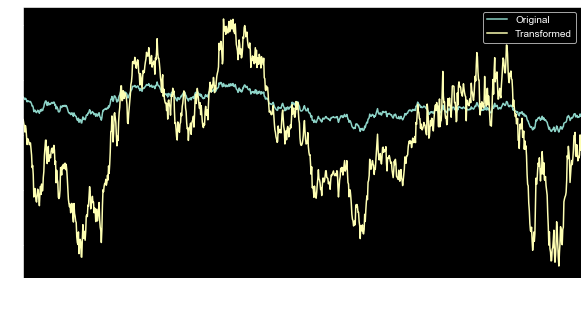

In [184]:
compare = pd.DataFrame({
    "Original": ts,
    "Transformed": transformed
})

compare.plot(figsize=(10,5))

Another common data transform is to replace missing data with the group mean.

In [185]:
countries = np.array(['US', 'UK', 'GR', 'JP'])
countries

array(['US', 'UK', 'GR', 'JP'], dtype='<U2')

In [188]:
key = countries[np.random.randint(0, 4, 10)]
key

array(['UK', 'GR', 'JP', 'JP', 'US', 'US', 'US', 'UK', 'UK', 'US'],
      dtype='<U2')

### Window and resample operations

It is possible to use `resample()`, `expanding()` and `rolling()` as methods on groupbys.

The example below will apply the `rolling()` method on the samples of the column B based on the groups of column A.

In [194]:
df_wd = pd.DataFrame({
    "A": [1] * 10 + [5] * 10,
    "B": np.arange(20)
})
df_wd

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [195]:
df_wd.groupby("A").rolling(4).B.mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [196]:
df_wd.groupby("A").expanding().sum()

A      B
A                
1 0    1.0    0.0
  1    2.0    1.0
  2    3.0    3.0
  3    4.0    6.0
  4    5.0   10.0
  5    6.0   15.0
  6    7.0   21.0
  7    8.0   28.0
  8    9.0   36.0
  9   10.0   45.0
5 10   5.0   10.0
  11  10.0   21.0
  12  15.0   33.0
  13  20.0   46.0
  14  25.0   60.0
  15  30.0   75.0
  16  35.0   91.0
  17  40.0  108.0
  18  45.0  126.0
  19  50.0  145.0

Suppose you want to use the `resample()` method to get a daily frequency in each group of your dataframe and wish to complete the missing values with the `ffill()` method.

In [199]:
df_re = pd.DataFrame({
    "date": pd.date_range(start="2021-08-02", periods=4, freq="W"),
    "group": [1, 1, 2, 2],
    "val": [5, 6, 7, 8]
}).set_index("date")
df_re

,group,val
date,,
2021-08-08,1,5
2021-08-15,1,6
2021-08-22,2,7
2021-08-29,2,8


In [203]:
df_re.groupby("group").resample("1D").ffill()

group  val
group date                  
1     2021-08-08      1    5
      2021-08-09      1    5
      2021-08-10      1    5
      2021-08-11      1    5
      2021-08-12      1    5
      2021-08-13      1    5
      2021-08-14      1    5
      2021-08-15      1    6
2     2021-08-22      2    7
      2021-08-23      2    7
      2021-08-24      2    7
      2021-08-25      2    7
      2021-08-26      2    7
      2021-08-27      2    7
      2021-08-28      2    7
      2021-08-29      2    8

## Filtration

The `filter` method returns a subset of the original object. Suppose we want to take only elements that belong to gruop sum greater than 2.

In [215]:
sf = pd.Series([1, 1, 2, 3, 3, 3])
sf.groupby(sf).groups

{1: [0, 1], 2: [2], 3: [3, 4, 5]}

In [216]:
sf.groupby(sf).filter(lambda x: x.sum() > 2)

3    3
4    3
5    3
dtype: int64

Another useful operation is filtering out elements that belong to groups with only a couple memebers.

In [217]:
dff = pd.DataFrame({
    "A": np.arange(8),
    "B": list("aabbbbcc")
})
dff.groupby("B").groups

{'a': [0, 1], 'b': [2, 3, 4, 5], 'c': [6, 7]}

In [221]:
dff.groupby("B").filter(lambda x: len(x) > 2)

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


## Dispatching to instance method

目的是解决函数多参数的问题, 比如下面的情况:


In [225]:
tsdf = pd.DataFrame(
    np.random.randn(1000, 3),
    index=pd.date_range('1/1/2000', periods=1000),
    columns=['A', 'B', 'C']
)
tsdf

,A,B,C
2000-01-01,-0.404826,-0.789630,1.273867
2000-01-02,-0.027187,0.171907,0.319949
2000-01-03,-0.090912,0.129569,-0.069833
2000-01-04,0.387350,1.442952,1.963506
2000-01-05,-0.722021,0.184644,-1.928803
...,...,...,...
2002-09-22,0.031714,-0.099753,-0.301839
2002-09-23,0.305619,0.008873,-1.384826
2002-09-24,0.822944,-1.219567,0.163281
2002-09-25,0.461466,0.640192,-1.826990


In [226]:
# 每隔 1 行置空一行
tsdf.iloc[::2] = np.nan
tsdf

,A,B,C
2000-01-01,NaN,NaN,NaN
2000-01-02,-0.027187,0.171907,0.319949
2000-01-03,NaN,NaN,NaN
2000-01-04,0.387350,1.442952,1.963506
2000-01-05,NaN,NaN,NaN
...,...,...,...
2002-09-22,0.031714,-0.099753,-0.301839
2002-09-23,NaN,NaN,NaN
2002-09-24,0.822944,-1.219567,0.163281
2002-09-25,NaN,NaN,NaN


In [229]:
# gorup by `index` of year
# chopped the collection of time series into yearly chunks
grouped = tsdf.groupby(lambda x: x.year)
# fill NAN forward
grouped.fillna(method='pad')

,A,B,C
2000-01-01,NaN,NaN,NaN
2000-01-02,-0.027187,0.171907,0.319949
2000-01-03,-0.027187,0.171907,0.319949
2000-01-04,0.387350,1.442952,1.963506
2000-01-05,0.387350,1.442952,1.963506
...,...,...,...
2002-09-22,0.031714,-0.099753,-0.301839
2002-09-23,0.031714,-0.099753,-0.301839
2002-09-24,0.822944,-1.219567,0.163281
2002-09-25,0.822944,-1.219567,0.163281


上面的例子主要用于说明, 当需要将具有多参数的函数(比如上面的 `fillna` 函数)应用于 grouped 对象时, 可以采用的方法.(也就是说当 lambda 函数不好用时)

## Flexible apply

The `apply` function can be subsitued for both `aggregate` and `transform` in many standard use case. Howere, `apply` can handle some exceptional use cases, for example:

In [230]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-2.088587,-1.508018
1,bar,one,-0.777610,1.909001
2,foo,two,0.957131,0.495509
3,bar,three,-0.437093,0.639942
4,foo,two,-1.519148,-0.204286
5,bar,two,0.159518,-1.144294
6,foo,one,-0.263362,-0.493755
7,foo,three,-1.273833,1.348952


In [231]:
# could also just call `.describe`
df.groupby('A').apply(lambda x: x.describe())

C         D
A                            
bar count  3.000000  3.000000
    mean  -0.351728  0.468217
    std    0.474360  1.533874
    min   -0.777610 -1.144294
    25%   -0.607352 -0.252176
    50%   -0.437093  0.639942
    75%   -0.138787  1.274472
    max    0.159518  1.909001
foo count  5.000000  5.000000
    mean  -0.837560 -0.072320
    std    1.201102  1.072228
    min   -2.088587 -1.508018
    25%   -1.519148 -0.493755
    50%   -1.273833 -0.204286
    75%   -0.263362  0.495509
    max    0.957131  1.348952

In [233]:
# The dimension of the returned result can also change
# 将一个 SeriesGroupBy 变成 DataFrame

# group: SeriesGroupBy
def f(group):
    return pd.DataFrame({
        'original': group,
        'demeaned': group - group.mean()
    })

# df.groupby('A')['C'] type: SeriesGroupBy
df.groupby('A')['C'].apply(f)

,original,demeaned
0,-2.088587,-1.251027
1,-0.777610,-0.425882
2,0.957131,1.794691
3,-0.437093,-0.085364
4,-1.519148,-0.681588
5,0.159518,0.511247
6,-0.263362,0.574198
7,-1.273833,-0.436273


In [235]:
# `apply` on a Series can operate on a returned value from the applied function, that is itself a series, and possibly upcast the result to a DataFrame:
# 在 Serise 上的 `apply` 可以将自己变成一个 DataFrame
pd.Series(np.random.rand(5)).apply(lambda x: pd.Series([x, x**2], index=['x', 'x^2']))

,x,x^2
0,0.440215,0.193789
1,0.539133,0.290664
2,0.799474,0.639159
3,0.997963,0.995930
4,0.597553,0.357070


> Note: `apply` 函数可以作为 reducer, transformer, filter 函数, 具体取决于传递给它的是什么函数. 主要看你选择的路径以及分组情况. 因此, 分组列可以包含在输出和设置索引上.

## Other useful features

### Automatic exclusion of "nuisance" columns

自动排除"滋扰"列.

如下面的例子, 当我们用 A 列分组计算"标准偏差"时, B 列的数据因为是字符串因此无法参与到计算中, 这种列被称为"滋扰"列(nuisance), 他们会自动被排除出输出结果.

In [236]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,3.005166,-0.026844
1,bar,one,0.631313,0.632053
2,foo,two,0.063137,-0.082825
3,bar,three,1.395876,0.355665
4,foo,two,0.856211,-0.380433
5,bar,two,-0.263705,0.228418
6,foo,one,-0.786851,-0.601591
7,foo,three,-0.109725,0.437931


In [273]:
# B 列是滋扰列, 因此被排除出显示结果
df.groupby('A').std()

,C,D
A,,
bar,0.830645,0.206359
foo,1.463352,0.393867


### Grouping with ordered factors

Pandas's Categorical 类的实例可以用 Categorical variables 来表示, 在这种方式下, 分组级别的排序将被保留:

In [284]:
# 正态分布的随机数列
data = pd.Series(np.random.randn(100))
data, data.max(), data.min()

(0    -0.503947
 1    -1.282783
 2    -0.294585
 3     1.674772
 4    -0.662044
         ...   
 95    1.343704
 96   -0.615192
 97    0.712225
 98   -1.797976
 99    1.836868
 Length: 100, dtype: float64,
 2.2782291378498774,
 -2.002238927093544)

In [290]:
# 基于 4 分为的分箱, 返回的是 Categories  对象
factor = pd.qcut(data, [0, 0.25, 0.5, 0.75, 1.0])
# 输出结果中, group key 是 factor, 其顺序是不会更给的
data.groupby(factor).mean()

(-2.0029999999999997, -0.585]   -1.109355
(-0.585, 0.0449]                -0.270693
(0.0449, 0.73]                   0.331392
(0.73, 2.278]                    1.304768
dtype: float64

### Grouping with a grouper specification

当需要指定更多的数据来进行分组, 可以使用 `pd.Grouper` 来进行局部控制.

In [291]:
import datetime

In [292]:
df = pd.DataFrame(
    {
        "Branch": "A A A A A A A B".split(),
        "Buyer": "Carl Mark Carl Carl Joe Joe Joe Carl".split(),
        "Quantity": [1, 3, 5, 1, 8, 1, 9, 3],
        "Date": [
            datetime.datetime(2013, 1, 1, 13, 0),
            datetime.datetime(2013, 1, 1, 13, 5),
            datetime.datetime(2013, 10, 1, 20, 0),
            datetime.datetime(2013, 10, 2, 10, 0),
            datetime.datetime(2013, 10, 1, 20, 0),
            datetime.datetime(2013, 10, 2, 10, 0),
            datetime.datetime(2013, 12, 2, 12, 0),
            datetime.datetime(2013, 12, 2, 14, 0),
        ],
    }
)

df

,Branch,Buyer,Quantity,Date
0,A,Carl,1,2013-01-01 13:00:00
1,A,Mark,3,2013-01-01 13:05:00
2,A,Carl,5,2013-10-01 20:00:00
3,A,Carl,1,2013-10-02 10:00:00
4,A,Joe,8,2013-10-01 20:00:00
5,A,Joe,1,2013-10-02 10:00:00
6,A,Joe,9,2013-12-02 12:00:00
7,B,Carl,3,2013-12-02 14:00:00


In [295]:
# 按指定列及期望的频率分组
df.groupby([pd.Grouper(freq='1M', key='Date'), 'Buyer']).sum()

Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2013-10-31 Carl          6
           Joe           9
2013-12-31 Carl          3
           Joe           9

### Enumerate group items

要查看每一行在其组中出现的顺序, 可使用 `cumcount` 方法

In [296]:
dfg = pd.DataFrame(list("aaabba"), columns=["A"])
dfg

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [297]:
dfg.groupby('A').cumcount()

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [299]:
dfg.groupby('A').cumcount(ascending=False)

0    3
1    2
2    1
3    1
4    0
5    0
dtype: int64

### Enumerate groups

要查看每行所在分组的顺序, 可使用 `ngroup`  函数

In [300]:
dfg.groupby('A').ngroup()

0    0
1    0
2    0
3    1
4    1
5    0
dtype: int64

In [301]:
dfg.groupby('A').ngroup(ascending=False)

0    1
1    1
2    1
3    0
4    0
5    1
dtype: int64

### Plotting

分组也可用使用图表的方式来分析

In [303]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(50, 2))
df['g'] = np.random.choice(['A', 'B'], size=50)
df.loc[df['g'] == 'B', 1] += 3
df

,0,1,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,3.887163,B
3,0.859588,-0.636524,A
4,0.015696,0.757315,B
5,1.150036,0.991946,A
6,0.953324,-2.021255,A
7,-0.334077,0.002118,A
8,0.405453,0.289092,A
9,1.321158,-1.546906,A


A         AxesSubplot(0.1,0.15;0.363636x0.75)
B    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

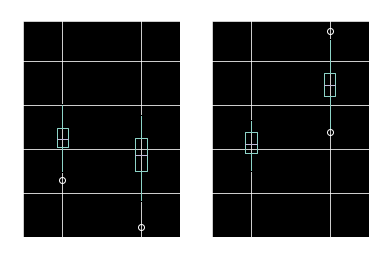

In [304]:
df.groupby('g').boxplot()

In [317]:
x = pd.Series({
    'a': np.random.randn(5),
    'b': np.random.randn(5)
}, name='metrics')
x

a    [-1.4404245712129062, 1.3184421737677743, -0.6...
b    [-0.13859446851031448, 1.24376869462116, 0.733...
Name: metrics, dtype: object